In [2]:
import glob
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
files = glob.glob('data/processed-parallel/*.csv')

In [4]:
files = ['data/processed-parallel/nli.csv',
         'data/processed-parallel/songs.csv',
         'data/processed-parallel/names.csv',
         'data/processed-parallel/yiddishland.csv',
         'data/processed-parallel/nouns.csv',
         'data/processed-parallel/refoyl.csv',
         'data/processed-parallel/brandeis.csv',
         'data/processed-parallel/ybc.csv',
         'data/processed-parallel/proverbs.csv',
         'data/processed-parallel/hebis.csv',
         'data/processed-parallel/lerman.csv',
         'data/processed-parallel/verterbukh.csv',
         'data/processed-parallel/wiktionary.csv']

In [5]:
dfs = [pd.read_csv(file) for file in files]

In [6]:
df = pd.concat(dfs)

In [7]:
len(df), len(df.drop_duplicates(['yiddish', 'translit']))

(201526, 174879)

In [8]:
df.groupby('source').size()

source
brandeis        11338
hebis            5322
jonne            2720
jonne-yivo       2750
lerman           1579
nli             12173
refoyl         127719
verterbukh       1998
wikidata         1832
wiktionary      10013
ybc             18011
yiddish-wit      1082
yidlid           2362
yivo             2627
dtype: int64

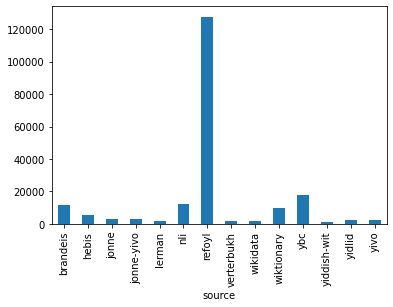

In [9]:
df.drop_duplicates().groupby('source').size().plot.bar()
plt.show()

In [12]:
df.groupby('yiddish').size().sort_values(ascending=False).head(20)

yiddish
שלמה            51
ישראל           47
און             41
משה             39
אין             38
געשיכטע         37
דער             36
יצחק            32
שמואל           30
חורבן           28
אברהם           27
דערציילונגען    27
שלום            27
חיים            27
די              26
מיט             26
קינדער          25
רבי             25
דוד             24
וועגן           23
dtype: int64

In [24]:
words = df.groupby('yiddish').size().sort_values(ascending=False).head(20).index.to_list()

In [46]:
df[df.yiddish == words[19]]

,yiddish,translit,source
296,וועגן,vegn,nli
2804,וועגן,venn,nli
2972,וועגן,svive,nli
3159,וועגן,Vegn,nli
4102,וועגן,vebn,nli
6661,וועגן,vegen,nli
2154,וועגן,vegn,yidlid
7059,וועגן,Ṿegn,brandeis
8791,וועגן,ṿegn,brandeis
9835,וועגן,Vegn,brandeis


In [21]:
set(df.source)

{'brandeis',
 'hebis',
 'jonne',
 'jonne-yivo',
 'lerman',
 'nli',
 'refoyl',
 'verterbukh',
 'wikidata',
 'ybc',
 'yiddish-wit',
 'yidlid',
 'yivo'}

In [47]:
df['yivo'] = df.source.apply(lambda x: x in (['jonne-yivo', 'lerman', 'refoyl', 'yiddish-wit', 'yidlid', 'yivo', 'verterbukh', 'wiktionary']))

In [48]:
df.to_csv('data/processed-parallel/words.csv', index=False)